# Import Libraries


In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
### Own data 

In [117]:
data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Advertising_Expenditure': [1000, 1500, 2000, 2500, 3000],
    'Target_Audience': ['Teens', 'Adults', 'Adults', 'Teens', 'Adults'],
    'Platform': ['TV', 'Online', 'Online', 'TV', 'TV'],
    'Sales': [200, 300, 400, 500, 600]
}

df = pd.DataFrame(data)

# Display the DataFrame


In [118]:
df.head()

,Product,Advertising_Expenditure,Target_Audience,Platform,Sales
0,Product A,1000,Teens,TV,200
1,Product B,1500,Adults,Online,300
2,Product C,2000,Adults,Online,400
3,Product D,2500,Teens,TV,500
4,Product E,3000,Adults,TV,600


# Data Preprocessing
# One-Hot Encoding for categorical features


In [119]:
encoder = OneHotEncoder(sparse_output=False)
encoded_audience = encoder.fit_transform(df[['Target_Audience']])
encoded_platform = encoder.fit_transform(df[['Platform']])

## Combine encoded features with the original dataframe

In [120]:
encoded_features = np.concatenate([encoded_audience, encoded_platform], axis=1)
X = np.concatenate([encoded_features, df[['Advertising_Expenditure']].values], axis=1)
y = df['Sales']

# Standardize the features

In [121]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing se

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model


In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model


In [124]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [125]:
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 0.0
R^2 Score: nan


# Visualize Results

In [126]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

# Actual vs Predicted Sales


Text(0.5, 1.0, 'Actual vs Predicted Sales')

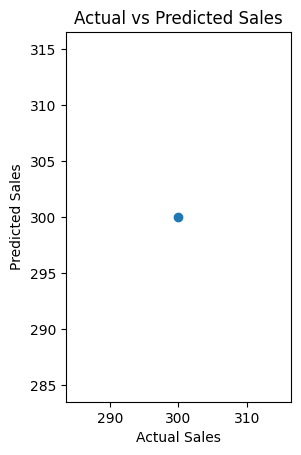

In [127]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

# Residuals


Text(0.5, 1.0, 'Residuals Distribution')

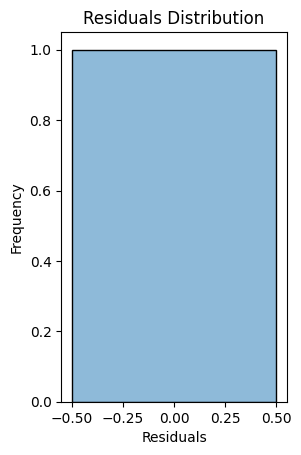

In [128]:
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

In [129]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Additional visualization - Scatter plot of Advertising Expenditure vs Sales with regression line


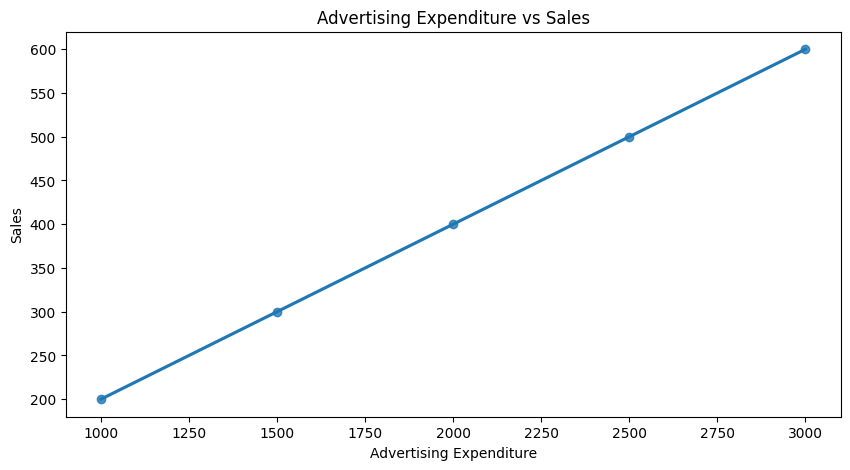

In [130]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df['Advertising_Expenditure'], y=df['Sales'])
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Advertising Expenditure vs Sales')
plt.show()